In [73]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Veri yolunu belirleme
train_dir = r"C:\Users\kbrzy\Downloads\archive ysa\Train"

# Klasördeki tüm sınıfları ve görüntüleri listeleme
print(f"'{train_dir}' klasöründeki sınıflar:", os.listdir(train_dir))



'C:\Users\kbrzy\Downloads\archive ysa\Train' klasöründeki sınıflar: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


In [75]:
images = []
labels = []

# Klasördeki tüm sınıflar ve bu sınıflara ait görüntüleri yükleme
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Görüntüyü gri tonlamada yükleme
            if img is not None:
                images.append(img)
                labels.append(class_name)

print(f"Toplam görüntü sayısı: {len(images)}")
print(f"Toplam etiket sayısı: {len(labels)}")


Toplam görüntü sayısı: 39209
Toplam etiket sayısı: 39209


In [77]:
import numpy as np
from sklearn.model_selection import train_test_split

# Özellik vektörlerini ve etiketleri hazırlama
X = []  # Özellikler (görüntü verisi)
y = []  # Etiketler

for img, label in zip(images, labels):
    # Histogram çıkarımı
    histogram = cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()  # Histogramı düzleştiriyoruz
    edge_count = np.sum(cv2.Canny(img, 100, 200) > 0)  # Kenar tespiti: Kenar olan piksel sayısı
    
    # Histogram ve kenar bilgisini birleştirerek özellik vektörü oluşturma
    feature_vector = np.append(histogram, edge_count)
    X.append(feature_vector)
    y.append(label)

# Verileri eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim verisi boyutu: {len(X_train)}")
print(f"Test verisi boyutu: {len(X_test)}")


Eğitim verisi boyutu: 31367
Test verisi boyutu: 7842


In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Veriyi ölçeklendirme
scaler = StandardScaler()

# Eğitim ve test verilerini ölçeklendirme
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MLP modelini oluşturma
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Modeli eğitim verisiyle eğitme
mlp_model.fit(X_train_scaled, y_train)

# Test verisiyle tahmin yapma
y_pred = mlp_model.predict(X_test_scaled)

# Modelin performansını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print(f"Model doğruluğu (Accuracy): {accuracy:.2f}")

# Sınıflandırma raporunu yazdırma
report = classification_report(y_test, y_pred)
print("\nSınıflandırma Raporu:\n", report)


Model doğruluğu (Accuracy): 0.30

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.19      0.26      0.22        38
           1       0.30      0.27      0.29       496
          10       0.27      0.40      0.32       398
          11       0.31      0.28      0.30       261
          12       0.39      0.40      0.39       443
          13       0.42      0.33      0.37       422
          14       0.29      0.34      0.31       135
          15       0.35      0.38      0.36       118
          16       0.33      0.36      0.34        86
          17       0.26      0.21      0.24       240
          18       0.33      0.32      0.32       215
          19       0.26      0.21      0.24        42
           2       0.22      0.24      0.23       420
          20       0.23      0.26      0.25        57
          21       0.19      0.16      0.18        67
          22       0.17      0.16      0.17        57
          23       0.29 

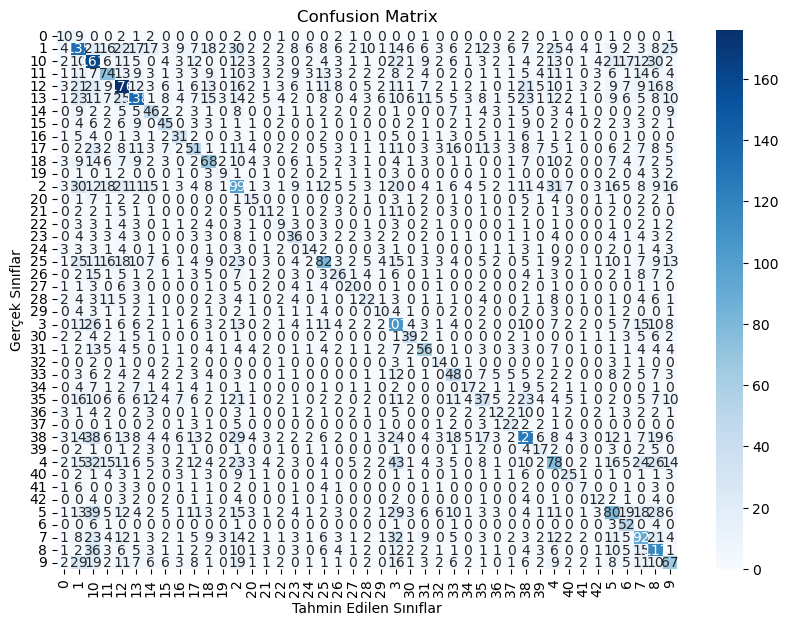

In [81]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix'i oluşturma
cm = confusion_matrix(y_test, y_pred, labels=mlp_model.classes_)

# Confusion matrix'i görselleştirme
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=mlp_model.classes_, yticklabels=mlp_model.classes_)
plt.xlabel('Tahmin Edilen Sınıflar')
plt.ylabel('Gerçek Sınıflar')
plt.title('Confusion Matrix')
plt.show()
